<a href="https://colab.research.google.com/github/bhavish-1/convolutional_neural_network/blob/master/Building_convolutional_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-09-01 08:06:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.200.128, 74.125.130.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   174MB/s    in 0.6s    

2022-09-01 08:06:28 (174 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
#inspecting the data ......
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/test/pizza

1001116.jpg  1507019.jpg  2242047.jpg  2944567.jpg  3669673.jpg  556507.jpg
1032754.jpg  1512557.jpg  22489.jpg    296426.jpg   3724187.jpg  565112.jpg
103708.jpg   153195.jpg   2250611.jpg  2971095.jpg  3724353.jpg  573054.jpg
1060407.jpg  1555015.jpg  226472.jpg   2992605.jpg  3724416.jpg  614236.jpg
106507.jpg   1594097.jpg  2265512.jpg  2997525.jpg  3728155.jpg  614981.jpg
1067986.jpg  1618659.jpg  2276783.jpg  300157.jpg   3729167.jpg  61656.jpg
1106738.jpg  1636919.jpg  2296393.jpg  3042459.jpg  373847.jpg	 625434.jpg
1119571.jpg  1655630.jpg  2320458.jpg  3049449.jpg  3754474.jpg  645087.jpg
11297.jpg    1686938.jpg  2323860.jpg  3092704.jpg  3758160.jpg  648055.jpg
1152100.jpg  1687143.jpg  2343304.jpg  309892.jpg   376625.jpg	 65128.jpg
1179703.jpg  1691503.jpg  2392727.jpg  3174637.jpg  3770514.jpg  666569.jpg
1180001.jpg  1694874.jpg  2398925.jpg  321526.jpg   3784357.jpg  678708.jpg
1180273.jpg  1765727.jpg  2406842.jpg  3216107.jpg  3785667.jpg  714866.jpg
1183595.jpg  177

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 2 directories and 0 images in 'pizza_steak'.
there are 2 directories and 0 images in 'pizza_steak/train'.
there are 0 directories and 750 images in 'pizza_steak/train/steak'.
there are 0 directories and 750 images in 'pizza_steak/train/pizza'.
there are 2 directories and 0 images in 'pizza_steak/test'.
there are 0 directories and 250 images in 'pizza_steak/test/steak'.
there are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
# for viewing an image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  return img

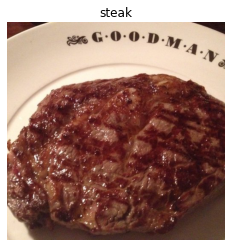

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [ ]:
img

array([[[ 93,  32,  27],
        [ 99,  38,  33],
        [ 98,  39,  33],
        ...,
        [ 27,  19,  17],
        [ 28,  19,  20],
        [ 27,  18,  19]],

       [[ 98,  39,  33],
        [100,  41,  35],
        [ 99,  40,  34],
        ...,
        [ 32,  22,  21],
        [ 29,  20,  21],
        [ 27,  18,  19]],

       [[102,  45,  38],
        [102,  45,  38],
        [101,  44,  37],
        ...,
        [ 34,  22,  22],
        [ 31,  21,  20],
        [ 28,  18,  17]],

       ...,

       [[232, 208, 174],
        [228, 204, 170],
        [226, 201, 170],
        ...,
        [109,  91,  67],
        [111,  93,  69],
        [111,  93,  71]],

       [[232, 208, 172],
        [230, 206, 172],
        [228, 204, 170],
        ...,
        [114,  96,  72],
        [120, 102,  80],
        [122, 104,  82]],

       [[232, 208, 172],
        [230, 206, 170],
        [229, 205, 171],
        ...,
        [118, 100,  76],
        [127, 109,  87],
        [131, 113,  91]]

In [ ]:
img.shape
#converting pixel numbers to 0 and 1
img/255

array([[[0.36470588, 0.1254902 , 0.10588235],
        [0.38823529, 0.14901961, 0.12941176],
        [0.38431373, 0.15294118, 0.12941176],
        ...,
        [0.10588235, 0.0745098 , 0.06666667],
        [0.10980392, 0.0745098 , 0.07843137],
        [0.10588235, 0.07058824, 0.0745098 ]],

       [[0.38431373, 0.15294118, 0.12941176],
        [0.39215686, 0.16078431, 0.1372549 ],
        [0.38823529, 0.15686275, 0.13333333],
        ...,
        [0.1254902 , 0.08627451, 0.08235294],
        [0.11372549, 0.07843137, 0.08235294],
        [0.10588235, 0.07058824, 0.0745098 ]],

       [[0.4       , 0.17647059, 0.14901961],
        [0.4       , 0.17647059, 0.14901961],
        [0.39607843, 0.17254902, 0.14509804],
        ...,
        [0.13333333, 0.08627451, 0.08627451],
        [0.12156863, 0.08235294, 0.07843137],
        [0.10980392, 0.07058824, 0.06666667]],

       ...,

       [[0.90980392, 0.81568627, 0.68235294],
        [0.89411765, 0.8       , 0.66666667],
        [0.88627451, 0

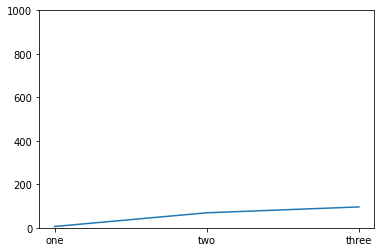

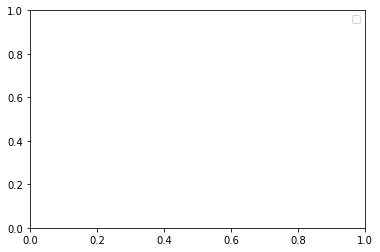

In [ ]:
x = [1, 2, 3]
y = [6, 69, 96]

plt.plot(x, y)
#plt.title("Linear graph", color="red", fontsize=25)
#plt.xlabel("x-axis")
#plt.ylabel("y-axis")
#plt.show()
plt.ylim(0, 1000)
plt.xticks(x, labels=["one", "two", "three", "four"])
plt.show()
plt.legend(["bhavish"])

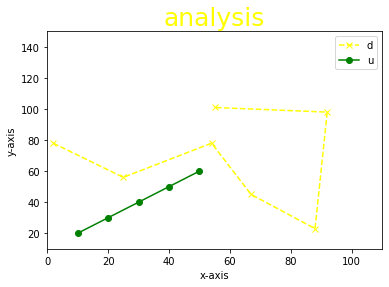

In [1]:
# ploting the data -------------------------------------- check this one -----------------------------------------------------
import matplotlib.pyplot as plt
x = [2, 25, 54, 67, 88, 92, 55]
y = [78, 56, 78, 45, 23, 98, 101]
x1 = [10, 20, 30, 40 ,50]
y1 = [20, 30, 40, 50, 60]
plt.plot(x, y, color="yellow", marker="x", linestyle="--")
plt.plot(x1, y1, color="green", marker="o")
plt.title("analysis", fontsize=25, color="yellow")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.xlim(0, 110)
plt.ylim(10, 150)

plt.legend("plot")
plt.legend("dude")

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#set the seed
tf.random.set_seed(42)

# preprocess data (get all of the pixel values between 1 and o, also called as scaling / normalization )
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
#---- Image datagenerator what it does is reduces originaal pixel values between 0 and 1

# setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size= 32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode= "binary",
                                               seed=42)
#create a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="sigmoid"), 
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid") #binary activation function                          
])

# compile the model 

model_1.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps=len(valid_data)
                        )





Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 208ms/step - loss: 1.4204 - accuracy: 0.5393 - val_loss: 0.5575 - val_accuracy: 0.7340
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.5345 - accuracy: 0.7513 - val_loss: 0.4625 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4958 - accuracy: 0.7773 - val_loss: 0.4657 - val_accuracy: 0.7700
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4892 - accuracy: 0.7780 - val_loss: 0.4237 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4820 - accuracy: 0.7767 - val_loss: 0.4075 - val_accuracy: 0.8460


In [ ]:
# define training and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# creating train and test data generators and rescale the data
## ImageDataGenerator helps to create the data into batches 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

# turning data into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size =(224, 224),
                                               class_mode = 'binary',
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory= test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size = 32)




Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Make the creating of our model a little easier

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# create the model (this can be oour baseline, a 3 layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # number feature extractractos that will be moving on our image
           kernel_size=3, # it will look a space of 3x3 each time.
           strides=1, # the number of pixels a filter will move accross as it covers the image
           padding='valid', 
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics =['accuracy'])
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps=len(test_data))



Epoch 1/5
47/47 [==============================] - 10s 199ms/step - loss: 1.0144 - accuracy: 0.6833 - val_loss: 0.4553 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4236 - accuracy: 0.8127 - val_loss: 0.3901 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3180 - accuracy: 0.8733 - val_loss: 0.3632 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 9s 189ms/step - loss: 0.2008 - accuracy: 0.9367 - val_loss: 0.3639 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 9s 189ms/step - loss: 0.0823 - accuracy: 0.9807 - val_loss: 0.4500 - val_accuracy: 0.8100


In [ ]:
#create the model (this can br our baseline, a 3 layer cnn)
model_5 = Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])
# compile model(same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 9s 187ms/step - loss: 0.6289 - accuracy: 0.6540 - val_loss: 0.5088 - val_accuracy: 0.7380
Epoch 2/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4762 - accuracy: 0.7847 - val_loss: 0.4858 - val_accuracy: 0.7380
Epoch 3/5
47/47 [==============================] - 9s 201ms/step - loss: 0.4185 - accuracy: 0.8093 - val_loss: 0.3464 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 9s 182ms/step - loss: 0.3900 - accuracy: 0.8227 - val_loss: 0.3350 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3810 - accuracy: 0.8293 - val_loss: 0.3469 - val_accuracy: 0.8480


In [ ]:
# generating modle number 6
model_6 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation="relu",
           input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])
model_6.compile(loss='binarycrossentropy',
                optimizer=Adam(),
                metrics=["accuracy"])
history_6= model_6.fit(epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(validation_data))

NameError: ignored

In [ ]:
#create a function to import an image and resize it to be able to use with 
def load_andprep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img

In [ ]:
u=load_andprep_image("/content/pizza.jpg")
u

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.1826925 , 0.13171211, 0.09742464],
        [0.17686446, 0.12588407, 0.09451152],
        [0.1604691 , 0.10948871, 0.07811616]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.21882872, 0.16482836, 0.14855559],
        [0.21257874, 0.15555844, 0.13324577],
        [0.19508454, 0.14026192, 0.1168504 ]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.24437143, 0.19280456, 0.17992815],
        [0.23928024, 0.1815684 , 0.1720271 ],
        [0.22441518, 0.16670334, 0.15716203]],

       ...,

       [[0.5139089 , 0.2374589 , 0.08300142],
        [0.57

In [ ]:
model_5.predict(u)

ValueError: ignored

In [ ]:
print(f"Shape before new dimension: {u.shape}")
u = tf.expand_dims(u, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {u.shape}")
u

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.1826925 , 0.13171211, 0.09742464],
         [0.17686446, 0.12588407, 0.09451152],
         [0.1604691 , 0.10948871, 0.07811616]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.21882872, 0.16482836, 0.14855559],
         [0.21257874, 0.15555844, 0.13324577],
         [0.19508454, 0.14026192, 0.1168504 ]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.24437143, 0.19280456, 0.17992815],
         [0.23928024, 0.1815684 , 0.1720271 ],
         [0.22441518, 0.16670334, 0.15716203]],

        ...,

        [[0.5139089 , 0.2374589 , 

In [ ]:
model_5.predict(u)

array([[0.00963922]], dtype=float32)